<a href="https://colab.research.google.com/github/Jeongyeon-Myeong/shopping-mall-item-classification/blob/main/text_classification_using_shoppingmall_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
os.mkdir("/content/text_classification")

In [ ]:
os.chdir('/content/text_classification')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_bags = pd.read_excel('text_list_bags.xlsx')

In [ ]:
data_onepiece = pd.read_excel('text_list_onepiece.xlsx')
data_pants = pd.read_excel('text_list_pants.xlsx')
data_shoes = pd.read_excel('text_list_shoes.xlsx')
data_tshirt = pd.read_excel('text_list_tshirt.xlsx')

In [ ]:
data_tshirt

,text,category
0,심플 와이드 넥 티(T-4622)/나인(NAIN) ...,tshirt
1,BNX 라운드넥 베이직 밑단티셔츠 (BS1TS085L0)/비엔엑스 ...,tshirt
2,레이온골지티셔츠 (J202PTT088)/매그제이(MAGJAY) ...,tshirt
3,[하프클럽/나크21]캐롤라인 나염 티셔츠 DM01-T-12/빅사이즈 ...,tshirt
4,레오파드옆트임티셔츠(PNJRTP015B)/파파야 ...,tshirt
...,...,...
495,[지오다노] 남 코튼린넨 반팔 폴로 스웨터 050507/지오다노 ...,tshirt
496,[시흥점][올젠]코튼 카라 반팔 티셔츠 옐로우 (ZOA2TT1301YE) ...,tshirt
497,헤지스남성[2020.S/S](HZTS0B447 N2)남성 캐주얼 네이비 헨리넥 면...,tshirt
498,[올젠][AK분당점][올젠]서커조직 스트라이프 티셔츠 ZOA2TT1312 NV ...,tshirt


In [ ]:
import pandas as pd
data = pd.concat([data_bags, data_onepiece])

In [ ]:
data = pd.concat([data, data_tshirt])

In [ ]:
# 전체 데이터셋
data

,text,category
0,러브참 바니 에코백_코튼 블루 ...,bags
1,소가죽 숄더 크로스백 PT6324 ...,bags
2,[라코스테]라코스테 XS 쇼핑 크로스백 블랙 (NF2609PO-000) ...,bags
3,[케즈]에코백 와이드 토트백2 SB100048외2종1택 ...,bags
4,스티치 양포켓 데일리 에코백 천가방 숄더백/ 홀리지 ...,bags
...,...,...
495,[지오다노] 남 코튼린넨 반팔 폴로 스웨터 050507/지오다노 ...,tshirt
496,[시흥점][올젠]코튼 카라 반팔 티셔츠 옐로우 (ZOA2TT1301YE) ...,tshirt
497,헤지스남성[2020.S/S](HZTS0B447 N2)남성 캐주얼 네이비 헨리넥 면...,tshirt
498,[올젠][AK분당점][올젠]서커조직 스트라이프 티셔츠 ZOA2TT1312 NV ...,tshirt


In [ ]:
"""
data = data.filter(['num','text','category'])
data_shoes = data.loc[0:191]
data_skincare = data.loc[192:391]
"""

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 66.5MB/s 
     |████████████████████████████████| 92kB 10.5MB/s 
     |████████████████████████████████| 3.6MB 46.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
from collections import Counter
from konlpy.tag import Hannanum
hanannanum = Hannanum()

In [ ]:
data
#data_skincare

,num,text,category
0,0,[아키클래식 본사]여름운동화27%!!브랜드 신발 런닝화 어글리슈즈 여성 남자 매쉬 키,shoes
1,1,BR127 여성운동화 조깅화 러닝화 워킹화 패션화 ...,shoes
2,2,여성 로또 라이트에어운동화 ...,shoes
3,3,월드컵 2020 s/s 여성 에어런닝화+패션슬리퍼 2종 ...,shoes
4,4,[신상]나이키레볼루션5 여성운동화 런닝화 조깅화 4종+나이키쿠션양말9900원추가구성,shoes
...,...,...,...
387,387,(1)동국제약 마데카 시즌5 액티브스킨 포뮬러 50ml 2개 ...,skincare
388,388,[킵쿨] 수드 대나무 로션 150ml/ 롭스 ...,skincare
389,389,퓨어 에센스 마스크시트 10종 [20매]/ 홀리카홀리카 ...,skincare
390,390,이자녹스 크리스탈 에이징 컴포팅 에센스 75ml ...,skincare


In [ ]:
import re
readData = '[SNRD] 1+1 신발 키높이 슬립온 운동화 컨버스 단화 슈즈 쿠키스니커즈' 
text = re.sub('[0-9-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', readData)
print(text)

SNRD  신발 키높이 슬립온 운동화 컨버스 단화 슈즈 쿠키스니커즈


In [ ]:
import re
def nons(dataset,num):
  texts = []
  for i in range(len(dataset)) : 
    try :
      text = re.sub('[0-9-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', dataset["text"][i+num]) #i + 192
      texts.append(hanannanum.nouns(text))
    except Exception as e :
      continue
  return texts

In [ ]:
#texts_shoes = nons(data_shoes, 0)
#texts_bags = nons(data_bags, 0)
#texts_onepiece = nons(data_onepiece, 0)
texts_pants = nons(data_pants, 0)
#texts_tshirt = nons(data_tshirt, 0)

In [ ]:
len(texts_pants)

500

In [ ]:
#texts_shoes
#texts_bags
#texts_onepiece
#texts_pants
texts_tshirt

[['심플', '와이드', '넥', '티T나인NAIN'],
 ['라운드넥', '베이직', '밑단티셔츠', 'BSTSL비엔엑스'],
 ['레이온골지티셔츠', 'JPTT매그제이MAGJAY'],
 ['하프클럽나크캐롤라', '나염', '티셔츠', 'DMT빅사이즈'],
 ['레오파드옆트임티셔츠PNJRTPB파파'],
 ['라운드넥', '프린트', '심플', '티셔츠TKTSF탑걸'],
 ['레터링', '베이직', '박시', '티셔츠TKTSF탑걸'],
 ['라운드', '프린팅', '포인트', '티셔츠TKTSF탑걸'],
 ['트로피칼반팔티셔츠AZTGK에이비에프'],
 ['도너츠', '프린팅', '포인트', '티셔츠', 'BKTSA르샵'],
 ['라운드넥', '레터링', '박스반팔티셔츠', 'BSTSL비엔엑스'],
 ['남성', '순면', '오버핏', '반팔', '티셔츠', 'EPATR엠폴햄'],
 ['꽃무늬티셔츠', 'HCMTSM샤트렌'],
 ['비지트인뉴욕', '라운드', '데', '리', '레이온', '무지', '반팔티셔츠', 'VALTD비지트인뉴'],
 ['어나더', '레터링', '프린팅', '티셔츠', 'GKHTSF지지피엑스'],
 ['스트라이프', '베이직', '티셔츠VMTSW코벳블'],
 ['피에이티', '쉬폰', '배색', '블라우스형', '티셔츠QF피에이티'],
 ['하프클럽탑온탑존슨즈롱티'],
 ['애녹', '쓰리포켓면티셔츠AXCTCS애녹'],
 ['막스마라프린트티셔츠IDCGRGEDJEL크레송'],
 ['어깨트임', '티셔츠', 'VMTS코벳블'],
 ['나염라운드반팔티', 'IDCFRA크레송'],
 ['드넬', '여름', '신상', '티셔츠원피스블라우스팬츠스커트가디건무지티남방데'],
 ['스팽글', '레터링', '린넨', '티셔츠BATS베네통'],
 ['솔리드', '반소매', '타', '탑', 'FATTOW세컨플'],
 ['가오리핏절개티셔츠', 'JPTT매그제이MAGJAY'],
 ['루즈핏프린트티셔츠NYWT나이스클랍'],
 ['스티치', '라운드', '소매'

In [ ]:
"""
def flatten(l):
  flatList = []
  for elem in l :
    if type(elem) == list :
      for e in elem:
        flatList.append(e)
    else :
      flatList.append(elem)
  return flatList
"""

In [ ]:
"""
texts_skincare = flatten(texts_skincare)
texts_shoes = flatten(texts_shoes)
"""

In [ ]:
texts_shoes = [x for x in texts_shoes if len(x)>1]
texts_bags = [x for x in texts_bags if len(x)>1]
texts_onepiece = [x for x in texts_onepiece if len(x)>1]
texts_pants = [x for x in texts_pants if len(x)>1]
texts_tshirt = [x for x in texts_tshirt if len(x)>1]

#texts_shoes
#texts_bags
#texts_onepiece
#texts_pants
#texts_tshirt

In [ ]:
"""
#문자열이 숫자인지 아닌지를 확인하고 숫자 제거
texts_skincare = [x for x in texts_skincare if not x.isdigit()]
texts_shoes = [x for x in texts_shoes if not x.isdigit()]
"""

In [ ]:
#texts_shoes
#texts_bags
#texts_onepiece
#texts_pants
texts_tshirt

[['심플', '와이드', '넥', '티T나인NAIN'],
 ['라운드넥', '베이직', '밑단티셔츠', 'BSTSL비엔엑스'],
 ['레이온골지티셔츠', 'JPTT매그제이MAGJAY'],
 ['하프클럽나크캐롤라', '나염', '티셔츠', 'DMT빅사이즈'],
 ['라운드넥', '프린트', '심플', '티셔츠TKTSF탑걸'],
 ['레터링', '베이직', '박시', '티셔츠TKTSF탑걸'],
 ['라운드', '프린팅', '포인트', '티셔츠TKTSF탑걸'],
 ['도너츠', '프린팅', '포인트', '티셔츠', 'BKTSA르샵'],
 ['라운드넥', '레터링', '박스반팔티셔츠', 'BSTSL비엔엑스'],
 ['남성', '순면', '오버핏', '반팔', '티셔츠', 'EPATR엠폴햄'],
 ['꽃무늬티셔츠', 'HCMTSM샤트렌'],
 ['비지트인뉴욕', '라운드', '데', '리', '레이온', '무지', '반팔티셔츠', 'VALTD비지트인뉴'],
 ['어나더', '레터링', '프린팅', '티셔츠', 'GKHTSF지지피엑스'],
 ['스트라이프', '베이직', '티셔츠VMTSW코벳블'],
 ['피에이티', '쉬폰', '배색', '블라우스형', '티셔츠QF피에이티'],
 ['애녹', '쓰리포켓면티셔츠AXCTCS애녹'],
 ['어깨트임', '티셔츠', 'VMTS코벳블'],
 ['나염라운드반팔티', 'IDCFRA크레송'],
 ['드넬', '여름', '신상', '티셔츠원피스블라우스팬츠스커트가디건무지티남방데'],
 ['스팽글', '레터링', '린넨', '티셔츠BATS베네통'],
 ['솔리드', '반소매', '타', '탑', 'FATTOW세컨플'],
 ['가오리핏절개티셔츠', 'JPTT매그제이MAGJAY'],
 ['스티치', '라운드', '소매', '벌룬', '티셔츠', 'ENLWZ이앤씨'],
 ['앞란프린트셔링티셔츠', 'HCMTS샤트렌'],
 ['반팔', '베이직', '슬림핏', '티셔츠TFEBADYTFE_B_ADYTFE', '라'],
 ['스티치장식', '린넨티'

In [ ]:
from gensim import corpora, models
import gensim

#texts_shoes
#texts_bags
#texts_onepiece
#texts_pants
#texts_tshirt

dictionary_shoes = corpora.Dictionary(texts_shoes)
corpus_shoes  = [ dictionary_shoes.doc2bow(text) for text in texts_shoes]

In [ ]:
ldamodel_shoes = gensim.models.ldamodel.LdaModel(corpus_shoes, num_topics=5,id2word=dictionary_shoes)
ldamodel_shoes.print_topics(num_words=5)

[(0, '0.042*"스니커즈" + 0.031*"여성" + 0.025*"남성" + 0.023*"신발" + 0.020*"슬립온"'),
 (1, '0.010*"운동화" + 0.009*"스니커즈" + 0.009*"나이키" + 0.009*"소가죽" + 0.009*"슈즈"'),
 (2, '0.021*"여성" + 0.018*"로퍼" + 0.017*"나이키" + 0.016*"런닝화" + 0.013*"슬립온"'),
 (3, '0.031*"운동화" + 0.028*"스니커즈" + 0.027*"남성" + 0.017*"슬립온" + 0.016*"여성"'),
 (4, '0.020*"여성" + 0.020*"플랫슈즈" + 0.017*"단" + 0.010*"블로퍼" + 0.009*"로퍼"')]

In [ ]:
dictionary_bags = corpora.Dictionary(texts_bags)
corpus_bags  = [ dictionary_bags.doc2bow(text) for text in texts_bags]
ldamodel_bags = gensim.models.ldamodel.LdaModel(corpus_bags, num_topics=5,id2word=dictionary_bags)
ldamodel_bags.print_topics(num_words=5)

[(0, '0.034*"에코백" + 0.029*"가방" + 0.017*"캉골" + 0.016*"에코" + 0.013*"블랙"'),
 (1, '0.018*"숄더백" + 0.017*"캉골" + 0.014*"리" + 0.014*"데" + 0.014*"크로스백"'),
 (2, '0.031*"에코백" + 0.024*"크로스백" + 0.016*"숄더백" + 0.014*"가방" + 0.013*"데"'),
 (3, '0.059*"크로스백" + 0.032*"숄더백" + 0.019*"여성" + 0.017*"에코백" + 0.015*"토트백"'),
 (4, '0.030*"토트백" + 0.014*"종" + 0.013*"갤러리아" + 0.012*"택" + 0.010*"백"')]

In [ ]:
#texts_onepiece
dictionary_onepiece = corpora.Dictionary(texts_onepiece)
corpus_onepiece  = [ dictionary_onepiece.doc2bow(text) for text in texts_onepiece]
ldamodel_onepiece = gensim.models.ldamodel.LdaModel(corpus_onepiece, num_topics=5,id2word=dictionary_onepiece)
ldamodel_onepiece.print_topics(num_words=5)

[(0, '0.047*"원피스" + 0.029*"롱" + 0.017*"랩" + 0.016*"관" + 0.016*"대구백화점"'),
 (1, '0.099*"원피스" + 0.031*"관" + 0.031*"대구백화점" + 0.017*"플레어" + 0.014*"체크"'),
 (2, '0.080*"원피스" + 0.045*"갤러리아" + 0.028*"관" + 0.028*"대구백화점" + 0.014*"플라워"'),
 (3, '0.040*"원피스" + 0.017*"롱" + 0.013*"롱원피스" + 0.010*"레이스" + 0.010*"벨티드"'),
 (4, '0.052*"원피스" + 0.022*"롱" + 0.016*"롱원피스" + 0.014*"여성" + 0.012*"셔츠"')]

In [ ]:
# bags : 0, onepiece : 1, pants : 2, shoes : 3, tshirt : 4
data_tshirt

,text,category
0,심플 와이드 넥 티(T-4622)/나인(NAIN) ...,tshirt
1,BNX 라운드넥 베이직 밑단티셔츠 (BS1TS085L0)/비엔엑스 ...,tshirt
2,레이온골지티셔츠 (J202PTT088)/매그제이(MAGJAY) ...,tshirt
3,[하프클럽/나크21]캐롤라인 나염 티셔츠 DM01-T-12/빅사이즈 ...,tshirt
4,레오파드옆트임티셔츠(PNJRTP015B)/파파야 ...,tshirt
...,...,...
495,[지오다노] 남 코튼린넨 반팔 폴로 스웨터 050507/지오다노 ...,tshirt
496,[시흥점][올젠]코튼 카라 반팔 티셔츠 옐로우 (ZOA2TT1301YE) ...,tshirt
497,헤지스남성[2020.S/S](HZTS0B447 N2)남성 캐주얼 네이비 헨리넥 면...,tshirt
498,[올젠][AK분당점][올젠]서커조직 스트라이프 티셔츠 ZOA2TT1312 NV ...,tshirt


In [ ]:
#texts_pants
dictionary_pants = corpora.Dictionary(texts_pants)
corpus_pants  = [ dictionary_pants.doc2bow(text) for text in texts_pants]

In [ ]:
ldamodel_pants = gensim.models.ldamodel.LdaModel(corpus_pants, num_topics=5,id2word=dictionary_pants)
ldamodel_pants.print_topics(num_words=5)

[(0, '0.044*"여름" + 0.034*"슬랙스" + 0.029*"바" + 0.028*"남자" + 0.026*"팬츠"'),
 (1, '0.031*"팬츠" + 0.030*"와이드" + 0.028*"린넨" + 0.025*"슬랙스" + 0.016*"밴딩"'),
 (2, '0.043*"부" + 0.020*"여름" + 0.018*"남성" + 0.017*"빅사이즈" + 0.017*"스판"'),
 (3, '0.016*"밴딩팬츠" + 0.014*"밴딩" + 0.012*"여성" + 0.012*"에이와비" + 0.010*"팬츠"'),
 (4, '0.046*"밴딩" + 0.032*"팬츠" + 0.027*"슬랙스" + 0.023*"남자" + 0.023*"여름"')]

In [ ]:
#texts_tshirt
dictionary_tshirts = corpora.Dictionary(texts_tshirt)
corpus_tshits  = [ dictionary_tshirts.doc2bow(text) for text in texts_tshirt]
ldamodel_tshirts = gensim.models.ldamodel.LdaModel(corpus_tshits, num_topics=5,id2word=dictionary_tshirts)
ldamodel_tshirts.print_topics(num_words=5)

[(0, '0.066*"반팔" + 0.065*"티셔츠" + 0.025*"갤러리아" + 0.023*"지오다노" + 0.022*"반팔티"'),
 (1, '0.033*"티셔츠" + 0.016*"프린트" + 0.012*"린넨" + 0.010*"면" + 0.010*"종"'),
 (2, '0.054*"티셔츠" + 0.036*"반팔" + 0.023*"스트라이프" + 0.016*"지오다노" + 0.011*"갤러리아"'),
 (3, '0.034*"티셔츠" + 0.022*"남성" + 0.022*"반팔" + 0.014*"반팔티셔츠" + 0.012*"갤러리아"'),
 (4, '0.050*"티셔츠" + 0.031*"종" + 0.026*"남성" + 0.022*"반팔" + 0.019*"반팔티셔츠"')]

In [ ]:
#word2vec 연관성 분석, 운동화
from gensim.models.word2vec import Word2Vec
model_shoes = Word2Vec(texts_shoes, sg =1, window=10, min_count=1)
model_shoes.init_sims(replace = True)
model_shoes.wv.most_similar("슈즈", topn = 10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('신발', 0.3329732418060303),
 ('캐쥬얼스니커즈', 0.3291008174419403),
 ('썸머', 0.3060663044452667),
 ('이슈', 0.2904713749885559),
 ('레프리', 0.28530389070510864),
 ('Mmisope일배송', 0.28164491057395935),
 ('아쿠아', 0.2776256799697876),
 ('분홍코끼리로밍', 0.2751200497150421),
 ('리복', 0.26747459173202515),
 ('스퀘어슬리퍼', 0.26346707344055176)]

In [ ]:
#word2vec 연관성 분석, 바지
from gensim.models.word2vec import Word2Vec
model_pants = Word2Vec(texts_pants, sg =1, window=10, min_count=1)
model_pants.init_sims(replace = True)
model_pants.wv.most_similar("바지", topn = 10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('부', 0.5503506660461426),
 ('쿨팬츠', 0.5194008350372314),
 ('바', 0.5144030451774597),
 ('빅사이즈', 0.5024783611297607),
 ('쿨', 0.49121326208114624),
 ('슬랙스', 0.4911423921585083),
 ('면', 0.482869952917099),
 ('여름', 0.48170921206474304),
 ('스판', 0.47866156697273254),
 ('남자', 0.475199818611145)]

In [ ]:
#word2vec 연관성 분석, 원피스
from gensim.models.word2vec import Word2Vec
model_onepiece = Word2Vec(texts_onepiece, sg =1, window=10, min_count=1)
model_onepiece.init_sims(replace = True)
model_onepiece.wv.most_similar("원피스", topn = 10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('갤러리아', 0.44185471534729004),
 ('롱원피스', 0.38401660323143005),
 ('롱', 0.35674554109573364),
 ('몰', 0.3464631140232086),
 ('레', 0.34314611554145813),
 ('슬릿', 0.33942943811416626),
 ('원피스ALWO랩', 0.33763518929481506),
 ('프릴', 0.32838183641433716),
 ('컬러', 0.3272370398044586),
 ('소매', 0.32185715436935425)]

In [ ]:
#word2vec 연관성 분석, 티셔츠
from gensim.models.word2vec import Word2Vec
model_tshirt = Word2Vec(texts_tshirt, sg =1, window=10, min_count=1)
model_tshirt.init_sims(replace = True)
model_tshirt.wv.most_similar("셔츠", topn = 10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('티셔츠', 0.4089730978012085),
 ('반팔', 0.3609800338745117),
 ('레터링', 0.34235477447509766),
 ('티', 0.3291793465614319),
 ('오버핏', 0.3080541491508484),
 ('티비제', 0.2948194742202759),
 ('리', 0.28900521993637085),
 ('게스진', 0.2879709303379059),
 ('져지', 0.28432324528694153),
 ('무지', 0.28367602825164795)]

In [ ]:
#word2vec 연관성 분석, 가방
from gensim.models.word2vec import Word2Vec
model_bags = Word2Vec(texts_bags, sg =1, window=10, min_count=1)
model_bags.init_sims(replace = True)
model_bags.wv.most_similar("가방", topn = 10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('핸드백', 0.39188042283058167),
 ('키플링', 0.3845861554145813),
 ('크로스백', 0.3675345182418823),
 ('미니백', 0.3409266769886017),
 ('리', 0.3385792374610901),
 ('핸드폰가방', 0.3284381330013275),
 ('종', 0.32739293575286865),
 ('원형', 0.32732489705085754),
 ('데', 0.32556986808776855),
 ('숄더백', 0.31743839383125305)]

In [ ]:
import re
def regEx(dataset):
  text = []
  for i in range(len(dataset)) : 
    try :
      dataset["text"][i] = re.sub('[0-9-=+,#/\?:^$_.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', dataset["text"][i]) #i + 192
      print(dataset["text"][i])
    except Exception as e :
      continue
  return dataset

In [ ]:
data_onepiece = regEx(data_onepiece)
data_bags = regEx(data_bags)
data_pants = regEx(data_pants)
data_shoes = regEx(data_shoes)
data_tshirt = regEx(data_tshirt)

 랩 LAP스퀘어넥 턱주름 원피스 ALWOE랩                                   
 ENC 밑단 테잎 배색 프릴 롱원피스 ENOWZ이앤씨                           
 배색 프릴 루즈핏 원피스 TLZOPEF탑걸                                        
 프릴소매 스트라이프 벨티드 원피스GICOPF지지피엑스                         
 탑걸탑걸 프릴카라롱원피스 TKZOPF                                         
 랩 LAP퍼프소매 슬림절개원피스ALWO랩                                   
 대구백화점 I관 쉬즈미스기존가 원보트넥 플리츠 니트 원피스SSKOPK
 대구백화점 I관 로마네꽁띠프릴 플리츠 뷔스티에원피스TKBOPF            
 듀엘 쉬폰 플라워 프릴넥 원피스 DMSE영등포점패션관                  
 갤러리아 SS 보더 패턴 맥시 원피스 TMOP                              
 랩 LAP벌룬 소매 롱원피스ALWO랩                                        
 카라 반팔 셔츠 플레어 원피스 PKEWOCA플라스틱아일랜드스토리              
 갤러리아 SS 브이넥 풀오픈 반다나 원피스 TMOP                        
 써스데이아일랜드 W몰 티어드 원피스 TMOPW                               
 대구백화점 II관 멜로디가든페이즐리 브이 원피스MO                    
 VW베라왕 썸머 플리츠 드레스                                                  
 EnC 캉캉 플레어 반팔 롱원피스 ENOWZ이앤씨                              
 프릴소매 스트라이프 벨티드 원피스GICOPF지지피엑스            

In [ ]:
import pandas as pd
data = pd.concat([data_bags, data_onepiece])
data = pd.concat([data, data_pants])
data = pd.concat([data, data_shoes])
data = pd.concat([data, data_tshirt])

In [ ]:
df = data.copy()
df 

,text,category
0,러브참 바니 에코백코튼 블루 ...,bags
1,소가죽 숄더 크로스백 PT ...,bags
2,라코스테라코스테 XS 쇼핑 크로스백 블랙 NFPO ...,bags
3,케즈에코백 와이드 토트백 SB외종택 ...,bags
4,스티치 양포켓 데일리 에코백 천가방 숄더백 홀리지 ...,bags
...,...,...
495,지오다노 남 코튼린넨 반팔 폴로 스웨터 지오다노 ...,tshirt
496,시흥점올젠코튼 카라 반팔 티셔츠 옐로우 ZOATTYE ...,tshirt
497,헤지스남성SSHZTSB N남성 캐주얼 네이비 헨리넥 면 반팔 라운드 티셔,tshirt
498,올젠AK분당점올젠서커조직 스트라이프 티셔츠 ZOATT NV ...,tshirt


In [ ]:
df['category'] = df['category'].replace(['bags', 'onepiece', 'pants', 'shoes', 'tshirt'],[0,1,2,3,4]) 
# bags : 0, onepiece : 1, pants : 2, shoes : 3, tshirt : 4

In [ ]:
x_data = df['text']
y_data = df['category']

In [ ]:
# https://wikidocs.net/22894 참고
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_data)
sequences = tokenizer.texts_to_sequences(x_data)

In [ ]:
word_to_index = tokenizer.word_index # 단어에 대해 인덱스를 부여한다.
print(word_to_index) # 부여된 정수는 각 단어의 빈도수가 높을수록 낮은 정수가 부여된다.

{'원피스': 1, '여성': 2, '티셔츠': 3, '남성': 4, '반팔': 5, '여름': 6, '갤러리아': 7, '종': 8, '대구백화점': 9, '밴딩': 10, '크로스백': 11, '린넨': 12, '팬츠': 13, '남자': 14, '슬랙스': 15, '빅사이즈': 16, '스니커즈': 17, '부': 18, '에코백': 19, 'ss': 20, 'i관': 21, '숄더백': 22, '스판': 23, '바지': 24, '미니': 25, '블랙': 26, '운동화': 27, '와이드': 28, '데일리': 29, '롱': 30, '가방': 31, '슬립온': 32, '토트백': 33, '택': 34, '면': 35, '신발': 36, '프린트': 37, '여자': 38, '나이키': 39, '스트라이프': 40, '라운드': 41, '런닝화': 42, '단화': 43, '캔버스': 44, '지오다노': 45, '신상': 46, '캐주얼': 47, '레터링': 48, '체크': 49, '쿨': 50, '로퍼': 51, '반팔티셔츠': 52, '코튼': 53, 'ii관': 54, '레이스': 55, '면바지': 56, '반팔티': 57, '캉골': 58, '포켓': 59, 'cm': 60, '베이직': 61, '남녀공용': 62, '워킹화': 63, '컬러': 64, '카라': 65, '반바지': 66, '소가죽': 67, 'color': 68, '플라워': 69, '배색': 70, '모코블링': 71, '브이넥': 72, '썸머': 73, '키높이': 74, '니트': 75, 'pt': 76, '백': 77, '플리츠': 78, '밴딩팬츠': 79, '조깅화': 80, '스몰': 81, '포인트': 82, '시원한': 83, 'v넥': 84, '핀턱': 85, '라운드넥': 86, '일자': 87, '폴로': 88, '에잇세컨즈': 89, '에코': 90, '슬리퍼': 91, '무지': 92, '펀칭': 93, '플레어': 94, '부츠컷': 9

In [ ]:
vocab_size = len(word_to_index) + 1

In [ ]:
n_of_train = int(len(sequences) * 0.8) #313
n_of_test = int(len(sequences) - n_of_train) #79

In [ ]:
x_data = sequences
print(max(len(l) for l in x_data)) # 최대길이 15

15


In [ ]:
for i in range(len(sequences)) :
  list_seq = sequences[i]
  a = []
  for x in range(len(list_seq)):
    if(list_seq[x] < 1001):
      a.append(list_seq[x])
    sequences[i] = a

In [ ]:
max_len = 15
data_sequence= pad_sequences(x_data, maxlen=max_len) #길이를 통일 시켜준다

In [ ]:
from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [ ]:
x_test = data_sequence[n_of_train:] # 뒤의 데이터
y_test = np.array(y_data[n_of_train:]) # 뒤의 데이터
x_train = data_sequence[:n_of_train] # 앞의 데이터
y_train = np.array(y_data[:n_of_train]) # 앞의 데이터

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [ ]:
y_train[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(Embedding(1001, 32))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
50/50 [==============================] - 1s 18ms/step - loss: 1.3298 - acc: 0.3744 - val_loss: 2.7790 - val_acc: 0.0000e+00
Epoch 2/20
50/50 [==============================] - 0s 5ms/step - loss: 1.1216 - acc: 0.7044 - val_loss: 2.4480 - val_acc: 0.0000e+00
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.7978 - acc: 0.8056 - val_loss: 2.3137 - val_acc: 0.0000e+00
Epoch 4/20
50/50 [==============================] - 0s 5ms/step - loss: 0.5409 - acc: 0.8294 - val_loss: 2.3492 - val_acc: 0.0000e+00
Epoch 5/20
50/50 [==============================] - 0s 5ms/step - loss: 0.4267 - acc: 0.8487 - val_loss: 2.2875 - val_acc: 0.0025
Epoch 6/20
50/50 [==============================] - 0s 5ms/step - loss: 0.3647 - acc: 0.8669 - val_loss: 1.7657 - val_acc: 0.0475
Epoch 7/20
50/50 [==============================] - 0s 5ms/step - loss: 0.3244 - acc: 0.8769 - val_loss: 1.9152 - val_acc: 0.0700
Epoch 8/20
50/50 [==============================] - 0s 5ms/step - loss: 0

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

16/16 [==============================] - 0s 2ms/step - loss: 5.1404 - acc: 0.0000e+00

 테스트 정확도: 0.0000


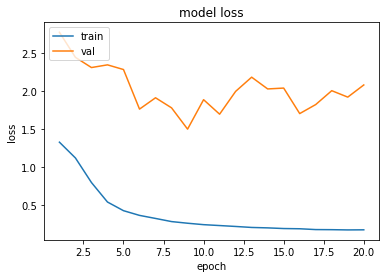

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()